In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Banking.csv')
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,6/5/2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10/12/2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [3]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

Shape of the DataFrame: (3000, 25)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card

In [4]:
df["Estimated Income"]

0        75384.77
1       289834.31
2       169935.23
3       356808.11
4       130711.68
          ...    
2995    297617.14
2996     42397.46
2997     48339.88
2998    107265.87
2999     56826.53
Name: Estimated Income, Length: 3000, dtype: float64

In [5]:
# Define income band boundaries
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Mid', 'High']

# Create the 'Income Band' column using pd.cut
df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, include_lowest=True)

In [6]:
# Examine the distribution of unique categories in categorical columns
categorical_cols = df[["Risk Weighting","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Occupation","Income Band"]].columns
for col in categorical_cols:
  # if col in ["Client ID","Name","Joined Bank"]:
  #   continue
  print(f"\nValue Counts for '{col}':")
  display(df[col].value_counts())


Value Counts for 'Risk Weighting':


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64


Value Counts for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64


Value Counts for 'Occupation':


Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64


Value Counts for 'Fee Structure':


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64


Value Counts for 'Loyalty Classification':


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64


Value Counts for 'Properties Owned':


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64


Value Counts for 'Risk Weighting':


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64


Value Counts for 'Occupation':


Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64


Value Counts for 'Income Band':


Income Band
Mid     1517
Low     1027
High     456
Name: count, dtype: int64

In [7]:
# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
display(df.describe())


Descriptive Statistics for Numerical Columns:


,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


## Univariate Analysis


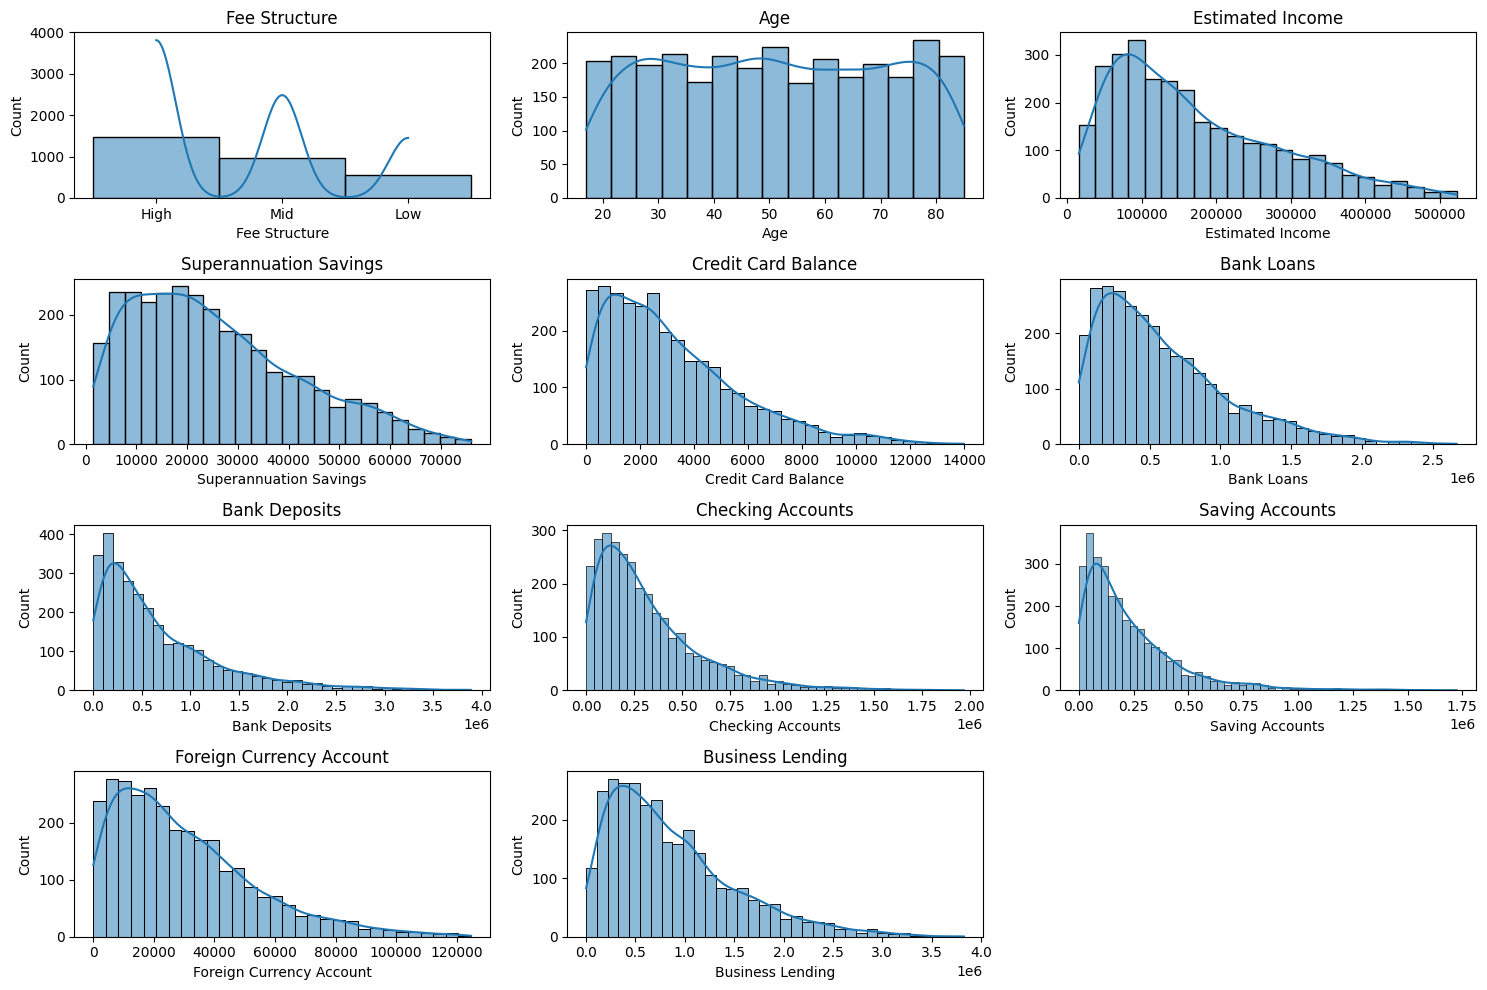

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical analysis and exploration
numerical_cols = ['Fee Structure','Age', 'Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

# Univariate analysis and visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

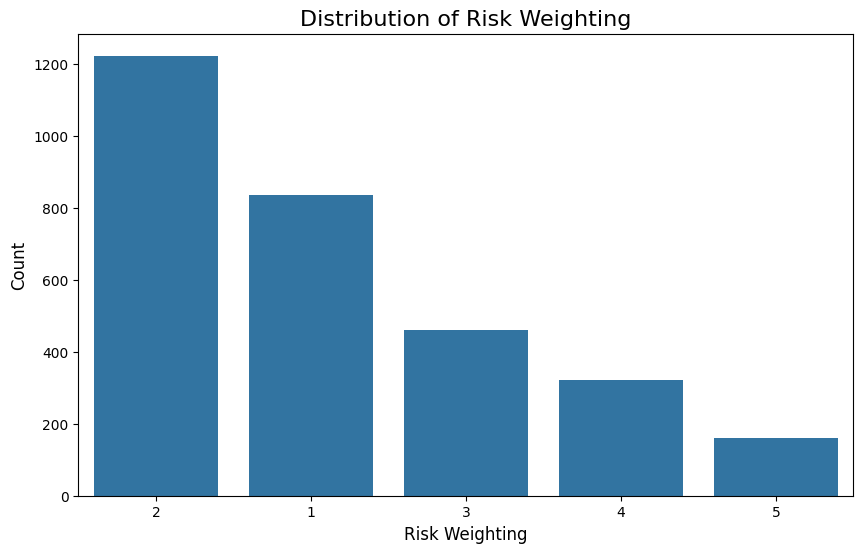

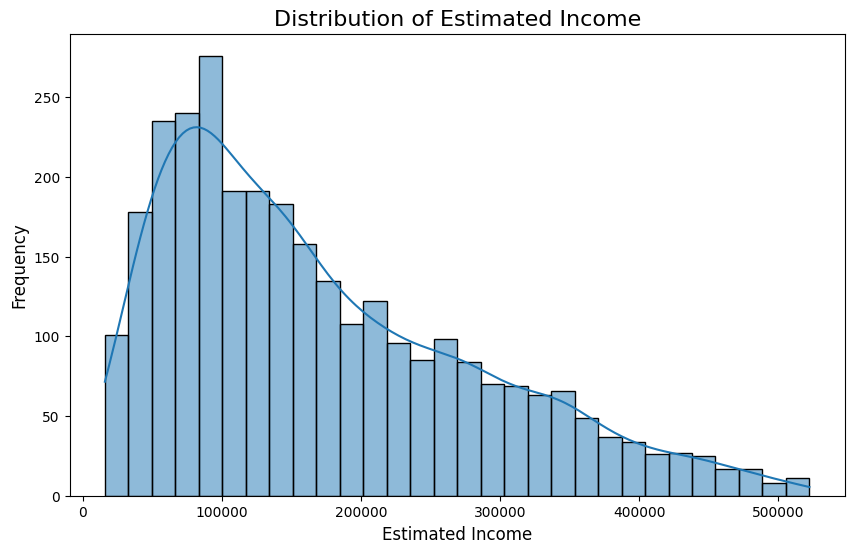

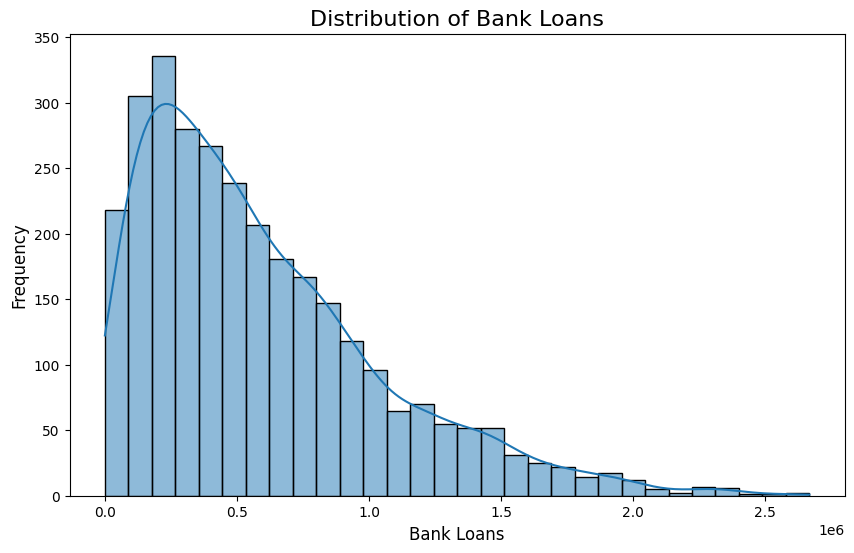

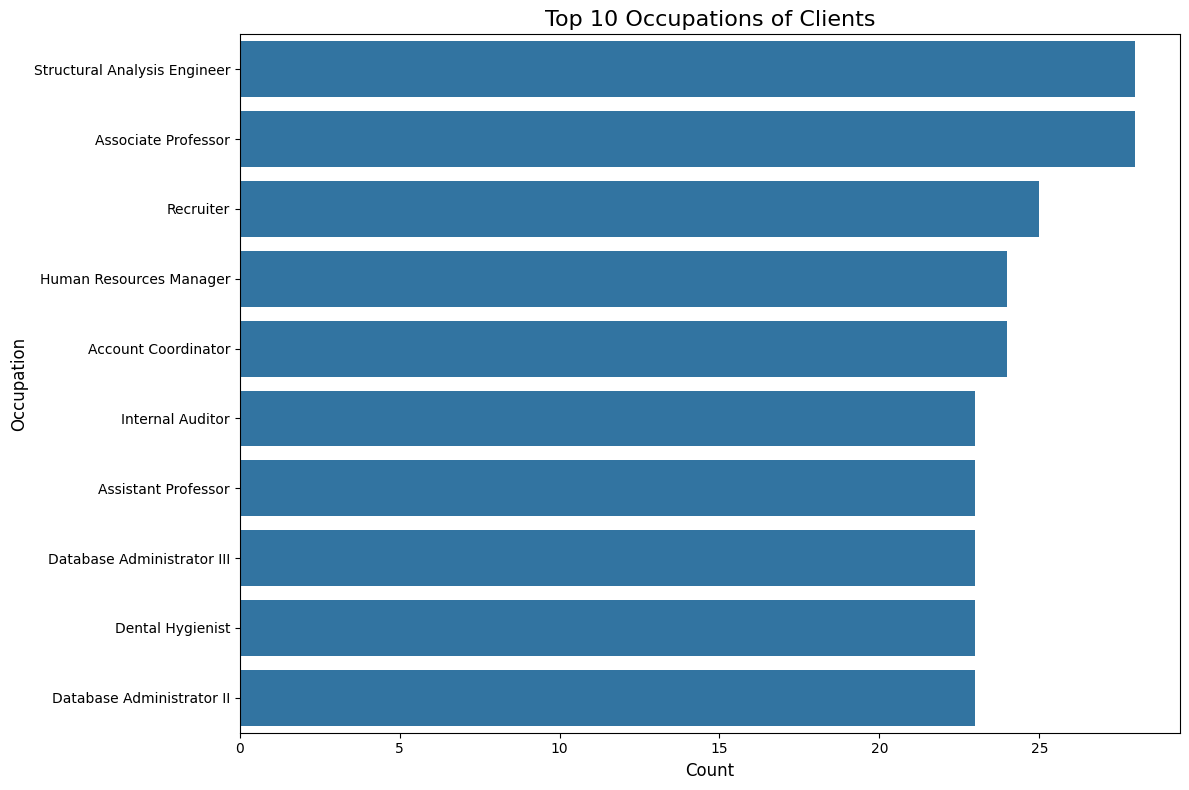

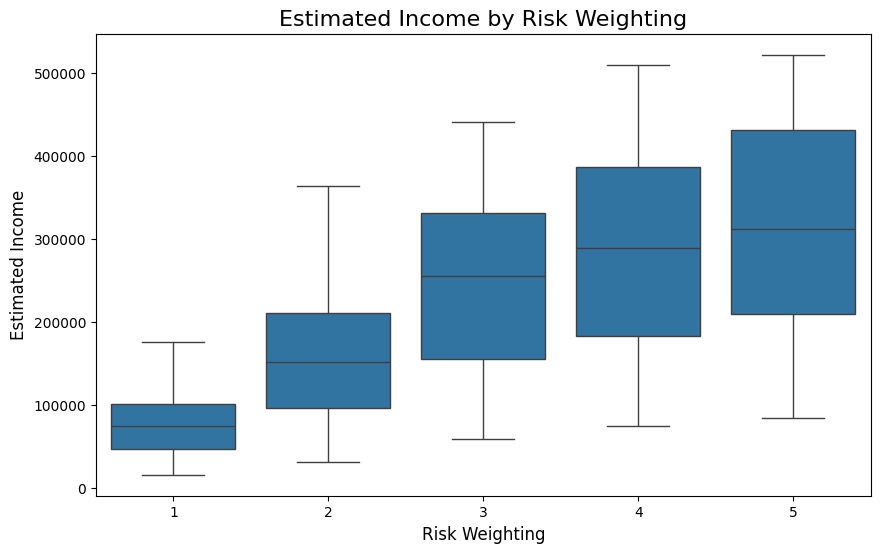

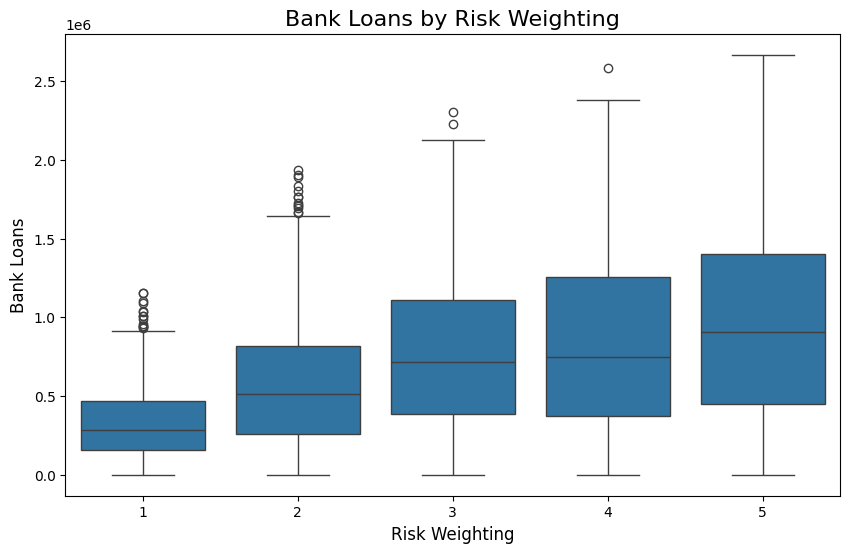

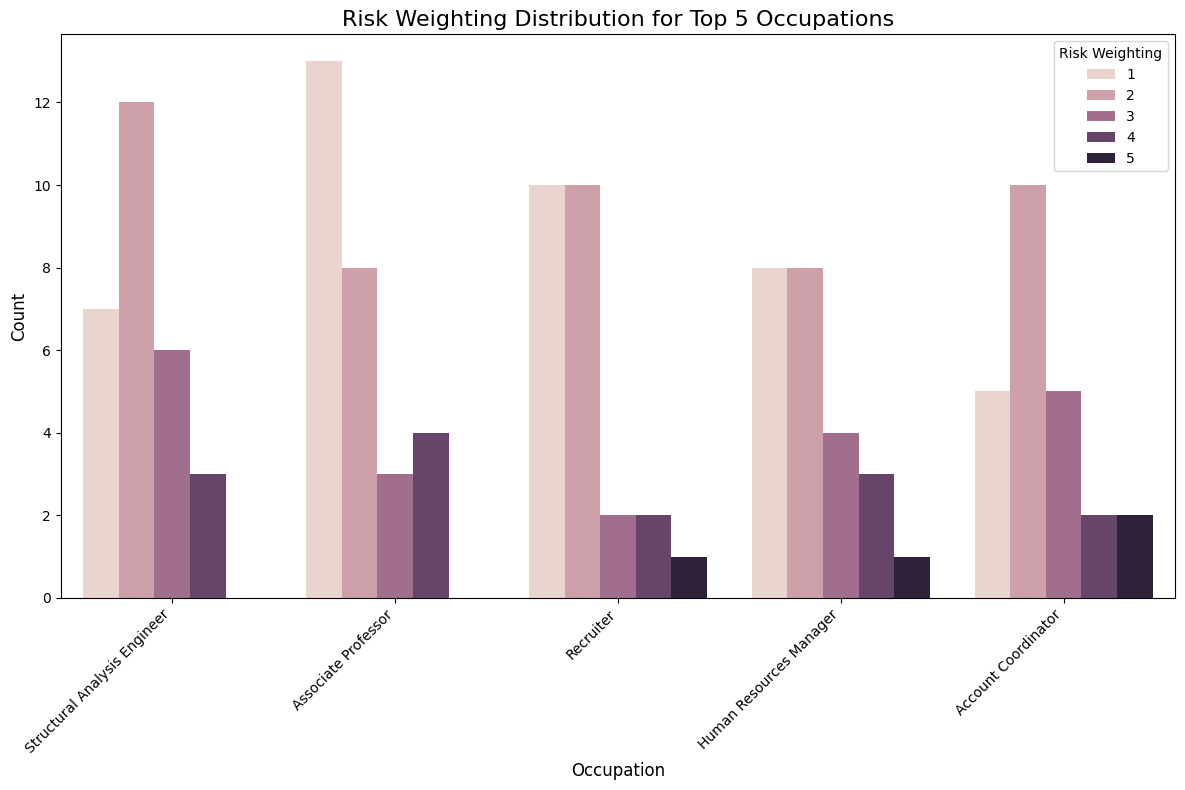

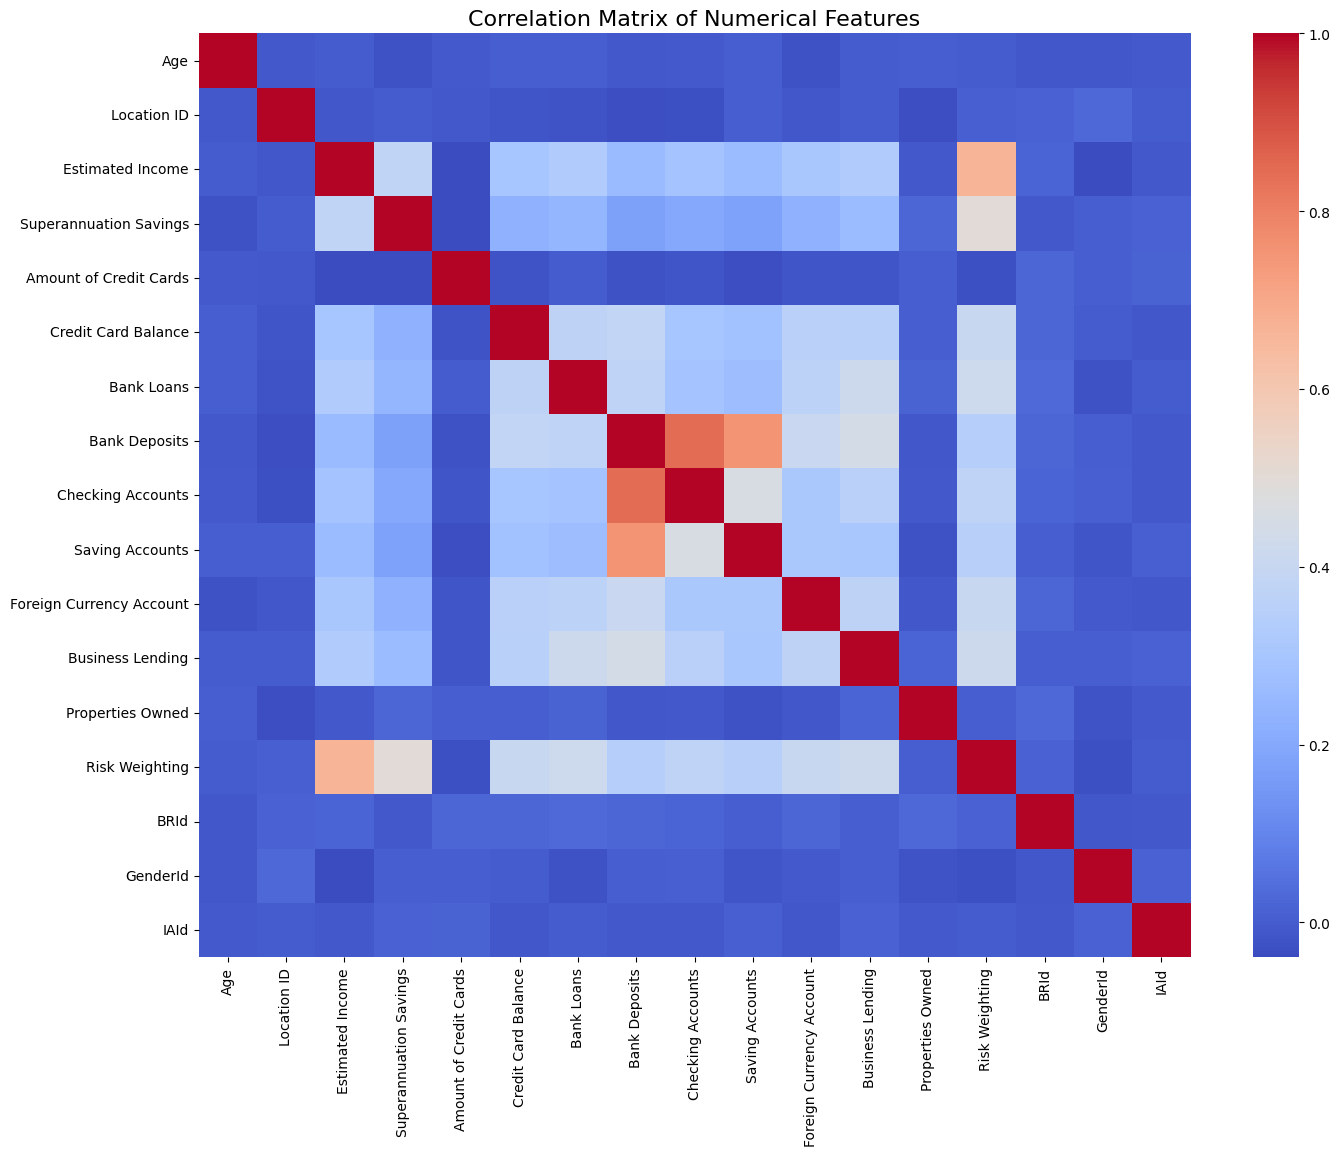

In [ ]:
#Plot1: Distribution of Risk Weighting
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk Weighting', data=df, order=df['Risk Weighting'].value_counts().index)
plt.title('Distribution of Risk Weighting', fontsize=16)
plt.xlabel('Risk Weighting', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.savefig('risk_weighting_distribution.png')
plt.show()

# Plot 2: Distribution of 'Estimated Income'
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Income'], bins=30, kde=True)
plt.title('Distribution of Estimated Income', fontsize=16)
plt.xlabel('Estimated Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('estimated_income_distribution.png')
plt.show()

# Plot 3: Distribution of 'Bank Loans'
plt.figure(figsize=(10, 6))
sns.histplot(df['Bank Loans'], bins=30, kde=True)
plt.title('Distribution of Bank Loans', fontsize=16)
plt.xlabel('Bank Loans', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('bank_loans_distribution.png')
plt.show()

# Plot 4: Top 10 Occupations of Clients
plt.figure(figsize=(12, 8))
top_10_occupations = df['Occupation'].value_counts().nlargest(10).index
sns.countplot(y='Occupation', data=df, order=top_10_occupations)
plt.title('Top 10 Occupations of Clients', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.tight_layout()
plt.savefig('top_10_occupations.png')
plt.show()

# --- Bivariate Analysis: Analyzing relationships between two variables ---

# Plot 5: Relationship between 'Risk Weighting' and 'Estimated Income'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk Weighting', y='Estimated Income', data=df)
plt.title('Estimated Income by Risk Weighting', fontsize=16)
plt.xlabel('Risk Weighting', fontsize=12)
plt.ylabel('Estimated Income', fontsize=12)
plt.savefig('income_by_risk_weighting.png')
plt.show()

# Plot 6: Relationship between 'Risk Weighting' and 'Bank Loans'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk Weighting', y='Bank Loans', data=df)
plt.title('Bank Loans by Risk Weighting', fontsize=16)
plt.xlabel('Risk Weighting', fontsize=12)
plt.ylabel('Bank Loans', fontsize=12)
plt.savefig('loans_by_risk_weighting.png')
plt.show()

# Plot 7: Risk profile across the Top 5 Occupations
top_5_occupations = df['Occupation'].value_counts().nlargest(5).index
df_top5_occ = df[df['Occupation'].isin(top_5_occupations)]
plt.figure(figsize=(12, 8))
sns.countplot(x='Occupation', hue='Risk Weighting', data=df_top5_occ, order=top_5_occupations)
plt.title('Risk Weighting Distribution for Top 5 Occupations', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Risk Weighting')
plt.tight_layout()
plt.savefig('risk_weighting_by_occupation.png')
plt.show()

# --- Multivariate Analysis: Correlation Heatmap ---

# Plot 8: Correlation matrix of all numerical features
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.savefig('correlation_heatmap.png')
plt.show()

In [10]:
# Calculate the total loan portfolio size
total_loan_amount = df['Bank Loans'].sum()

# Determine the loan amount cutoff for the top 5% of borrowers
top_5_percent_cutoff = df['Bank Loans'].quantile(0.95)

# Sum the loans of only the clients in that top 5%
loan_from_top_clients = df[df['Bank Loans'] >= top_5_percent_cutoff]['Bank Loans'].sum()

# Calculate what percentage of the total portfolio this represents
percentage_of_loan_from_top_clients = (loan_from_top_clients / total_loan_amount) * 100

print(f"The top 5% of clients (by loan amount) hold {percentage_of_loan_from_top_clients:.2f}% of the total loan portfolio.")

The top 5% of clients (by loan amount) hold 15.34% of the total loan portfolio.


In [14]:
# Calculate the average loan balance for the lowest risk (Risk Weighting = 1)
avg_loan_risk_1 = df[df['Risk Weighting'] == 1]['Bank Loans'].mean()

# Calculate the average loan balance for the highest risk (Risk Weighting = 5)
avg_loan_risk_5 = df[df['Risk Weighting'] == 5]['Bank Loans'].mean()

# Calculate the percentage increase
percentage_increase = ((avg_loan_risk_5 - avg_loan_risk_1) / avg_loan_risk_1) * 100

print(f"Average loan for Low-Risk (Risk=1): ${avg_loan_risk_1:,.2f}")
print(f"Average loan for High-Risk (Risk=5): ${avg_loan_risk_5:,.2f}")
print(f"High-risk clients hold loans that are {percentage_increase:.2f}% larger than low-risk clients.")

Average loan for Low-Risk (Risk=1): $334,192.15
Average loan for High-Risk (Risk=5): $975,216.62
High-risk clients hold loans that are 191.81% larger than low-risk clients.


In [15]:
# Define what 'low risk' means (Risk Weighting 1 or 2)
low_risk_population_percentage = len(df[df['Risk Weighting'].isin([1, 2])]) / len(df) * 100

# Filter for the specific occupation
engineer_df = df[df['Occupation'] == 'Structural Analysis Engineer']
low_risk_engineer_percentage = len(engineer_df[engineer_df['Risk Weighting'].isin([1, 2])]) / len(engineer_df) * 100

# Calculate the increased likelihood
likelihood_increase = ((low_risk_engineer_percentage - low_risk_population_percentage) / low_risk_population_percentage) * 100

print(f"Percentage of general population in low-risk categories: {low_risk_population_percentage:.2f}%")
print(f"Percentage of 'Structural Analysis Engineers' in low-risk categories: {low_risk_engineer_percentage:.2f}%")
print(f"Engineers are {likelihood_increase:.2f}% more likely to be in low-risk categories.")

Percentage of general population in low-risk categories: 68.60%
Percentage of 'Structural Analysis Engineers' in low-risk categories: 67.86%
Engineers are -1.08% more likely to be in low-risk categories.


## Some other Insights: